#Social Media and Mental Health Analysis
###Table of Contents:

1. Code Implementation
* (Description of the code used for data cleaning, analysis, and graphs.)

2. Visualizations
* (Graphs and charts that provide insights into the relationship between social media use and mental health.)

3. Conclusions
* (Summary of key findings from the analysis and potential implications for future studies or actions.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/content/MENTAL HEALTH DATA.csv")

In [3]:
df.shape


(579, 118)

In [5]:
#Checking the df columns

df.head(1)

,year_1,state_1,general_health,phq9_1,phq9_2,phq9_3,phq9_4,phq9_5,phq9_6,phq9_7,...,acha_12months_any_comp,sex,fulltime,international,race_1,race_2,race_3,race_4,race_5,race_6
0,2000,MD,Very Good,Several days,Several days,Not at all,Several days,Not at all,Not at all,More than half of the days,...,2,Female,Yes,No,NaN,NaN,NaN,Asian or Pacific Islander,NaN,NaN


In [6]:
# Deleting columns that are not necessary for this study case

df = df.drop(df.columns[3:22], axis=1)
df.head(1)

,year_1,state_1,general_health,phq9_severity,gad7_1,gad7_2,gad7_3,gad7_4,gad7_5,gad7_6,...,acha_12months_any_comp,sex,fulltime,international,race_1,race_2,race_3,race_4,race_5,race_6
0,2000,MD,Very Good,Mild depression,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,...,2,Female,Yes,No,NaN,NaN,NaN,Asian or Pacific Islander,NaN,NaN


In [7]:
df = df.drop(df.columns[4:19], axis=1)
df.head(1)

,year_1,state_1,general_health,phq9_severity,gad7_severity,acha_12months_times_1,acha_12months_times_2,acha_12months_times_3,acha_12months_times_4,acha_12months_times_5,...,acha_12months_any_comp,sex,fulltime,international,race_1,race_2,race_3,race_4,race_5,race_6
0,2000,MD,Very Good,Mild depression,minimal anxiety,Never,11 or more times,5-6 times,3-4 times,Never,...,2,Female,Yes,No,NaN,NaN,NaN,Asian or Pacific Islander,NaN,NaN


In [8]:
column_index = df.columns.get_loc('sex')
column_index

75

In [9]:
df = df.drop(df.columns[5:74], axis=1)
df.head(1)

,year_1,state_1,general_health,phq9_severity,gad7_severity,acha_12months_any_comp,sex,fulltime,international,race_1,race_2,race_3,race_4,race_5,race_6
0,2000,MD,Very Good,Mild depression,minimal anxiety,2,Female,Yes,No,NaN,NaN,NaN,Asian or Pacific Islander,NaN,NaN


In [10]:
# Renaming the columns for better understanding
df = df.rename(columns={'year_1': 'year_born', 'state_1': 'state','race_1': 'White_not_Hispanic', 'race_2': 'Black_not_Hispanic', 'race_3': 'Hispanic_or_Latino', 'race_4': 'Asian_or_PacificIslander', 'race_5': 'AmericanIndian_or_AlaskanNative', 'race_6': 'Other'})

#White_not_Hispanic
#Black_not_Hispanic
#Hispanic_or_Latino
#Asian_or_PacificIslander
#AmericanIndian_or_AlaskanNative
#Other
df.head(1)

,year_born,state,general_health,phq9_severity,gad7_severity,acha_12months_any_comp,sex,fulltime,international,White_not_Hispanic,Black_not_Hispanic,Hispanic_or_Latino,Asian_or_PacificIslander,AmericanIndian_or_AlaskanNative,Other
0,2000,MD,Very Good,Mild depression,minimal anxiety,2,Female,Yes,No,NaN,NaN,NaN,Asian or Pacific Islander,NaN,NaN


In [12]:
# Checking the current columns after deleting some
df.columns

Index(['year_born', 'state', 'general_health', 'phq9_severity',
       'gad7_severity', 'acha_12months_any_comp', 'sex', 'fulltime',
       'international', 'White_not_Hispanic', 'Black_not_Hispanic',
       'Hispanic_or_Latino', 'Asian_or_PacificIslander',
       'AmericanIndian_or_AlaskanNative', 'Other'],
      dtype='object')

In [14]:
# Checking the new columns/rows numbers

df.shape

(579, 15)

In [15]:
df.head(1)

,year_born,state,general_health,phq9_severity,gad7_severity,acha_12months_any_comp,sex,fulltime,international,White_not_Hispanic,Black_not_Hispanic,Hispanic_or_Latino,Asian_or_PacificIslander,AmericanIndian_or_AlaskanNative,Other
0,2000,MD,Very Good,Mild depression,minimal anxiety,2,Female,Yes,No,NaN,NaN,NaN,Asian or Pacific Islander,NaN,NaN


In [16]:
# Calculating values by race

White_not_Hispanic_quantity = df['White_not_Hispanic'].value_counts()
Black_not_Hispanic_quantity = df['Black_not_Hispanic'].value_counts()
Hispanic_or_Latino_quantity = df['Hispanic_or_Latino'].value_counts()
Asian_or_PacificIslander_quantity = df['Asian_or_PacificIslander'].value_counts()
AmericanIndian_or_AlaskanNative_quantity = df['AmericanIndian_or_AlaskanNative'].value_counts()
Other_quantity = df['Other'].value_counts()

In [17]:
# Counting by sex


sex_womans = df[df['sex'] == 'Female'].shape[0]


sex_mens = df[df['sex'] != 'Female'].shape[0]

print(f'Total W: {sex_womans}')
print(f'Total M: {sex_mens}')


Total W: 393
Total M: 186


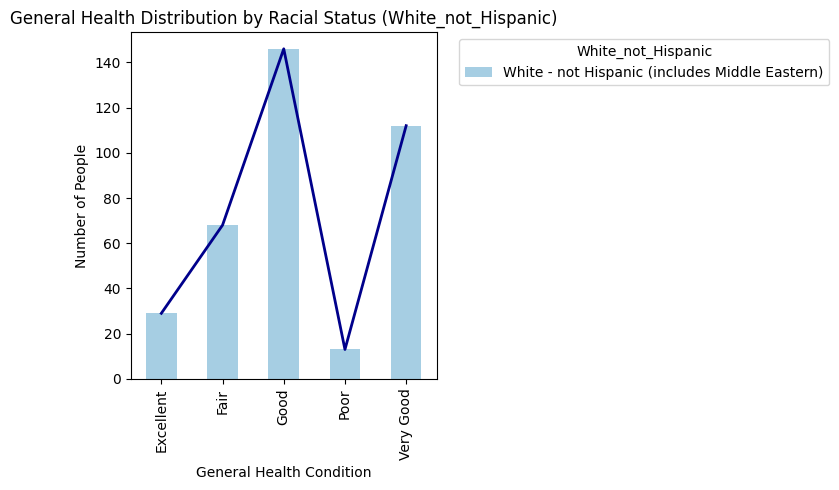

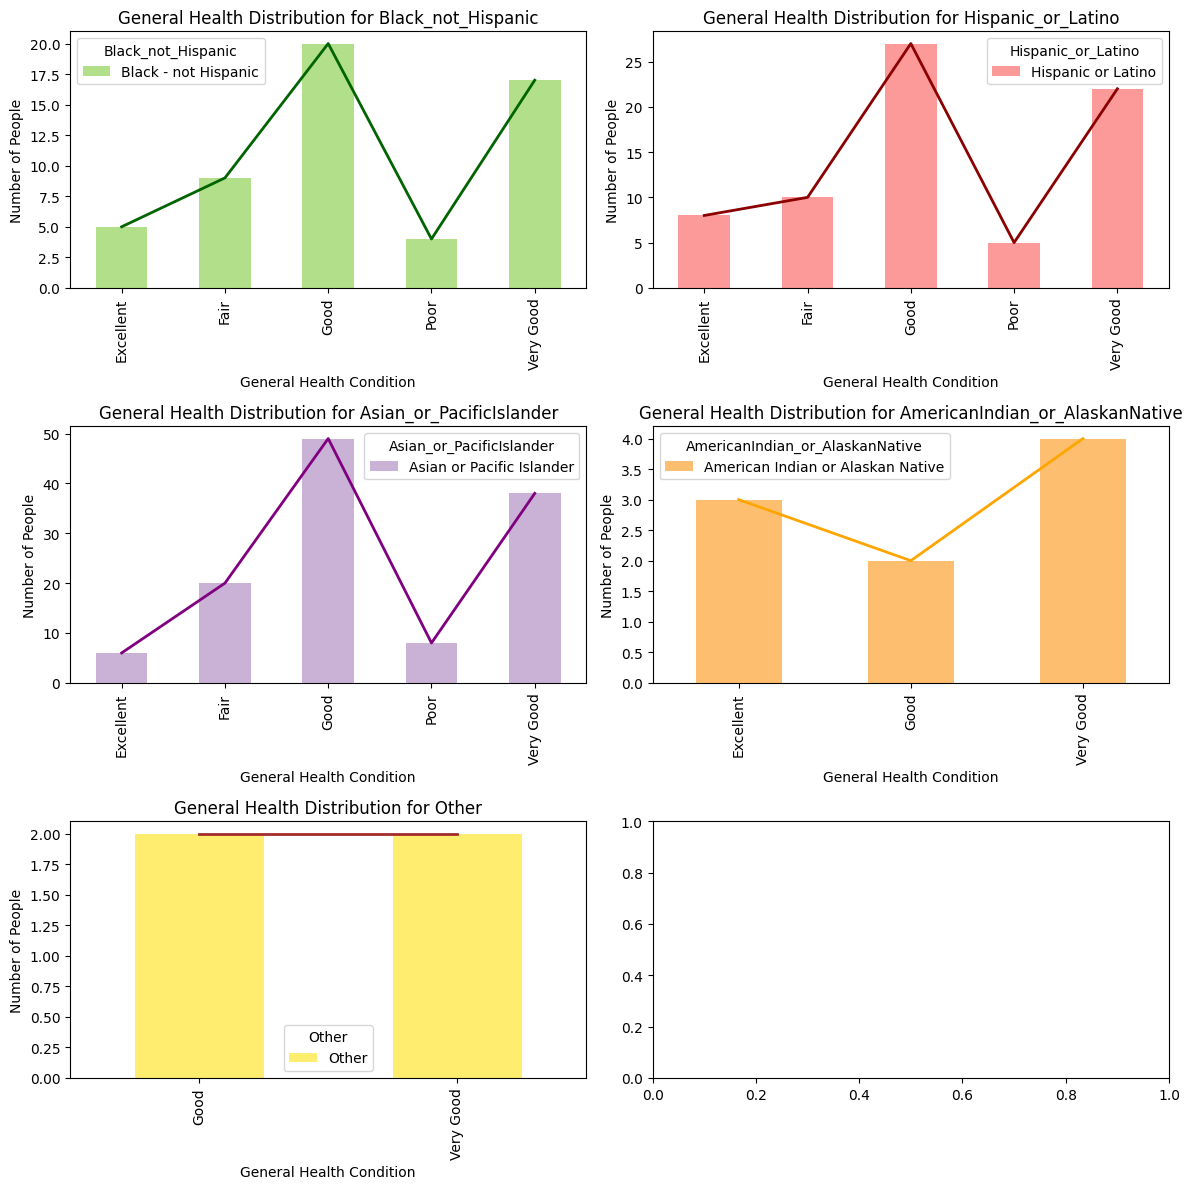

In [21]:
# Visualizations using matplotlib


import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 4]
#--------------------------------------------------------------

# General
White_not_Hispanic_general_health = df.groupby(['general_health', 'White_not_Hispanic']).size().unstack()
White_not_Hispanic_general_health.plot(kind='bar', stacked=True, figsize=(8, 5), color=['#a6cee3', '#1f78b4'])
plt.title('General Health Distribution by Racial Status (White_not_Hispanic)')
plt.xlabel('General Health Condition')
plt.ylabel('Number of People')
plt.legend(title='White_not_Hispanic', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add a line on top of the bar chart
plt.plot(White_not_Hispanic_general_health.sum(axis=1), color='darkblue', linestyle='-', linewidth=2)

plt.tight_layout()
plt.show()

#--------------------------------------------------------------
# Group and count occurrences for each racial group based on 'general_health'
Black_not_Hispanic_general_health = df.groupby(['general_health', 'Black_not_Hispanic']).size().unstack()
Hispanic_or_Latino_quantity_general_health = df.groupby(['general_health', 'Hispanic_or_Latino']).size().unstack()
Asian_or_PacificIslander_quantity_general_health = df.groupby(['general_health', 'Asian_or_PacificIslander']).size().unstack()
AmericanIndian_or_AlaskanNative_quantity_general_health = df.groupby(['general_health', 'AmericanIndian_or_AlaskanNative']).size().unstack()
Other_quantity_general_health = df.groupby(['general_health', 'Other']).size().unstack()

# Create stacked bar charts for each group with a smaller size
fig, axs = plt.subplots(3, 2, figsize=(12, 12))  # Size adjustment

#--------------------------------------------------------------
# Black_not_Hispanic Chart
Black_not_Hispanic_general_health.plot(kind='bar', stacked=True, ax=axs[0, 0], color=['#b2df8a', '#33a02c'])
axs[0, 0].set_title('General Health Distribution for Black_not_Hispanic')
axs[0, 0].set_xlabel('General Health Condition')
axs[0, 0].set_ylabel('Number of People')

# Add a line on top of the bar chart
axs[0, 0].plot(Black_not_Hispanic_general_health.sum(axis=1), color='darkgreen', linestyle='-', linewidth=2)

#--------------------------------------------------------------
# Hispanic_or_Latino Chart
Hispanic_or_Latino_quantity_general_health.plot(kind='bar', stacked=True, ax=axs[0, 1], color=['#fb9a99', '#e31a1c'])
axs[0, 1].set_title('General Health Distribution for Hispanic_or_Latino')
axs[0, 1].set_xlabel('General Health Condition')
axs[0, 1].set_ylabel('Number of People')

# Add a line on top of the bar chart
axs[0, 1].plot(Hispanic_or_Latino_quantity_general_health.sum(axis=1), color='darkred', linestyle='-', linewidth=2)

#--------------------------------------------------------------
# Asian_or_PacificIslander Chart
Asian_or_PacificIslander_quantity_general_health.plot(kind='bar', stacked=True, ax=axs[1, 0], color=['#cab2d6', '#6a3d9a'])
axs[1, 0].set_title('General Health Distribution for Asian_or_PacificIslander')
axs[1, 0].set_xlabel('General Health Condition')
axs[1, 0].set_ylabel('Number of People')

# Add a line on top of the bar chart
axs[1, 0].plot(Asian_or_PacificIslander_quantity_general_health.sum(axis=1), color='purple', linestyle='-', linewidth=2)

#--------------------------------------------------------------
# AmericanIndian_or_AlaskanNative Chart
AmericanIndian_or_AlaskanNative_quantity_general_health.plot(kind='bar', stacked=True, ax=axs[1, 1], color=['#fdbf6f', '#ff7f00'])
axs[1, 1].set_title('General Health Distribution for AmericanIndian_or_AlaskanNative')
axs[1, 1].set_xlabel('General Health Condition')
axs[1, 1].set_ylabel('Number of People')

# Add a line on top of the bar chart
axs[1, 1].plot(AmericanIndian_or_AlaskanNative_quantity_general_health.sum(axis=1), color='orange', linestyle='-', linewidth=2)

#--------------------------------------------------------------
# Other Chart
Other_quantity_general_health.plot(kind='bar', stacked=True, ax=axs[2, 0], color=['#ffed6f', '#b15928'])
axs[2, 0].set_title('General Health Distribution for Other')
axs[2, 0].set_xlabel('General Health Condition')
axs[2, 0].set_ylabel('Number of People')

# Add a line on top of the bar chart
axs[2, 0].plot(Other_quantity_general_health.sum(axis=1), color='brown', linestyle='-', linewidth=2)

# Adjust layout to avoid overlap and ensure everything is visible
plt.tight_layout()
plt.show()



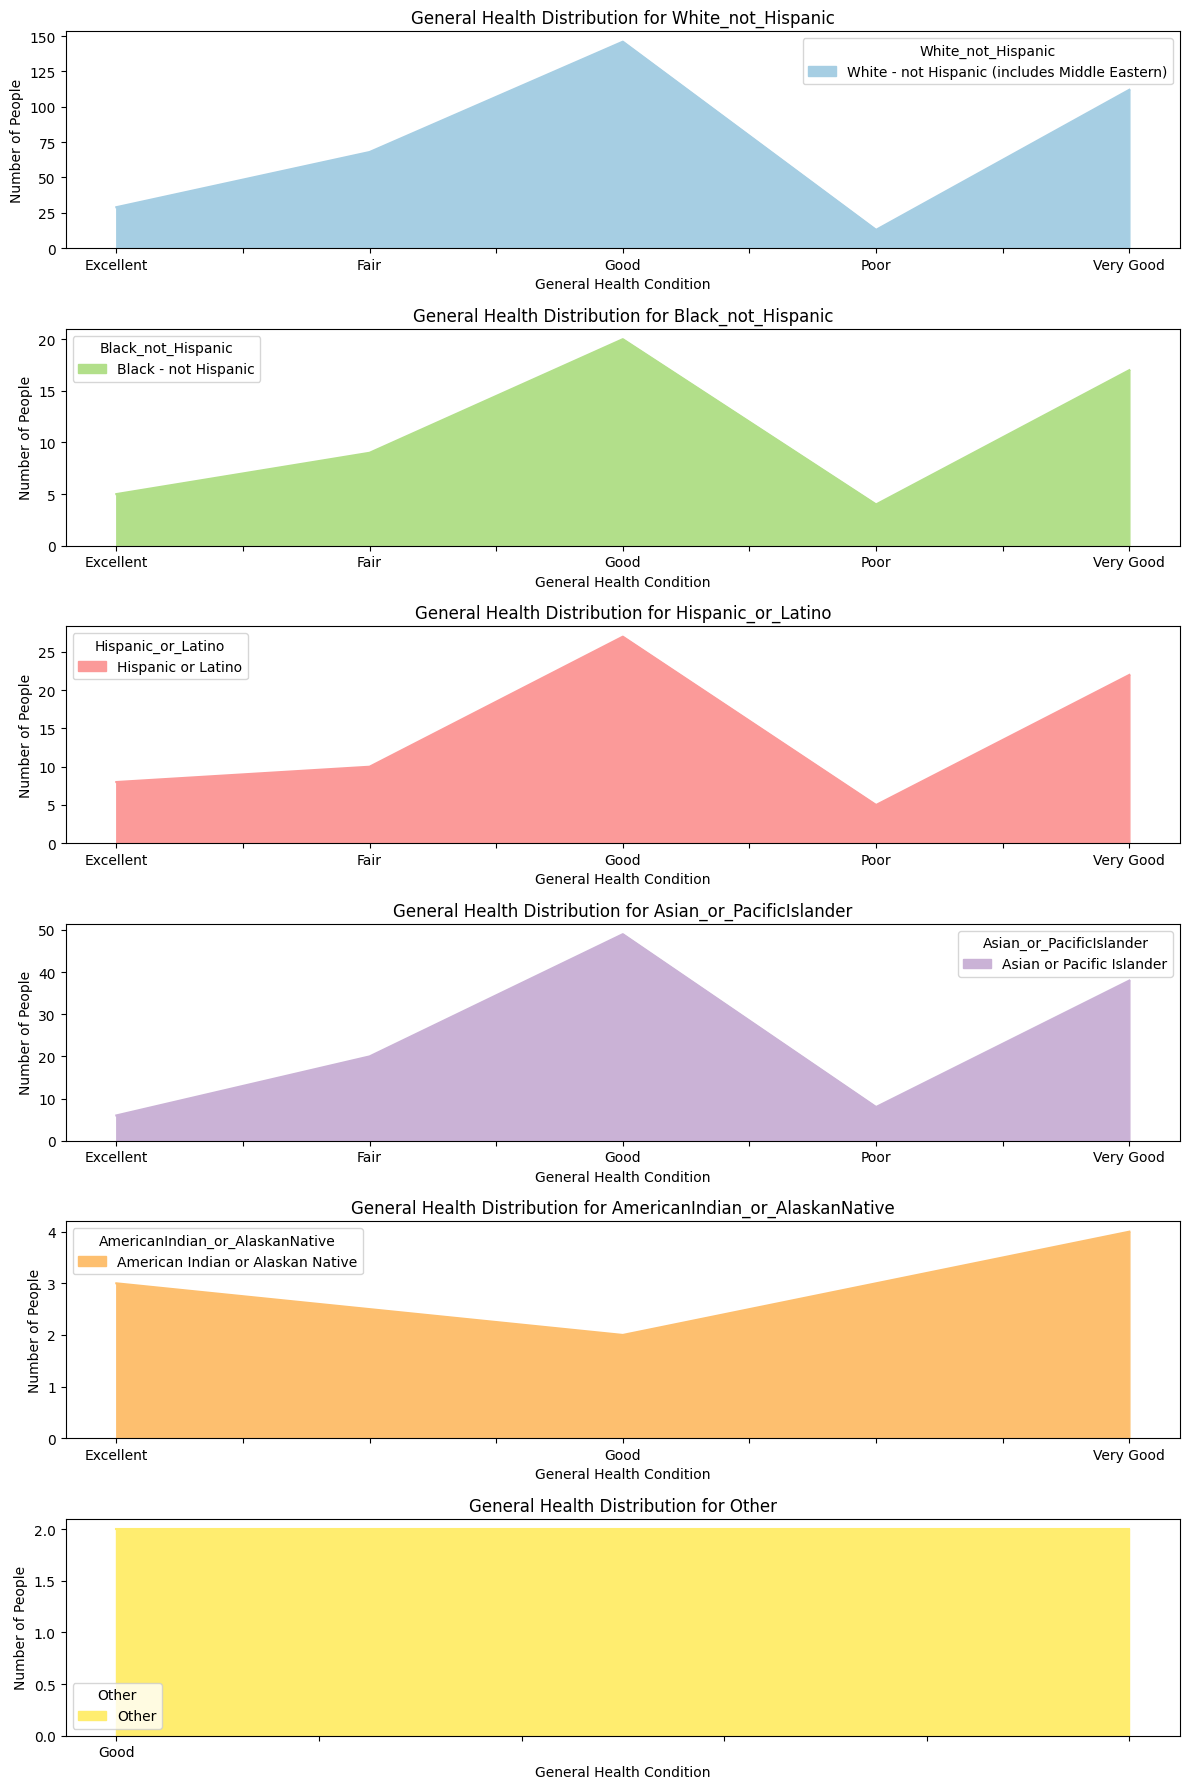

In [59]:
# Visualizations using matplotlib (kind=area)


White_not_Hispanic_general_health = df.groupby(['general_health', 'White_not_Hispanic']).size().unstack()
Black_not_Hispanic_general_health = df.groupby(['general_health', 'Black_not_Hispanic']).size().unstack()
Hispanic_or_Latino_quantity_general_health = df.groupby(['general_health', 'Hispanic_or_Latino']).size().unstack()
Asian_or_PacificIslander_quantity_general_health = df.groupby(['general_health', 'Asian_or_PacificIslander']).size().unstack()
AmericanIndian_or_AlaskanNative_quantity_general_health = df.groupby(['general_health', 'AmericanIndian_or_AlaskanNative']).size().unstack()
Other_quantity_general_health = df.groupby(['general_health', 'Other']).size().unstack()


fig, axs = plt.subplots(6, 1, figsize=(12, 18))  # 6 rows, 1 column

# chart for each racial group

# White_not_Hispanic
White_not_Hispanic_general_health.plot(kind='area', stacked=True, ax=axs[0], color=['#a6cee3', '#1f78b4'])
axs[0].set_title('General Health Distribution for White_not_Hispanic')
axs[0].set_xlabel('General Health Condition')
axs[0].set_ylabel('Number of People')

# Black_not_Hispanic
Black_not_Hispanic_general_health.plot(kind='area', stacked=True, ax=axs[1], color=['#b2df8a', '#33a02c'])
axs[1].set_title('General Health Distribution for Black_not_Hispanic')
axs[1].set_xlabel('General Health Condition')
axs[1].set_ylabel('Number of People')

# Hispanic_or_Latino
Hispanic_or_Latino_quantity_general_health.plot(kind='area', stacked=True, ax=axs[2], color=['#fb9a99', '#e31a1c'])
axs[2].set_title('General Health Distribution for Hispanic_or_Latino')
axs[2].set_xlabel('General Health Condition')
axs[2].set_ylabel('Number of People')

# Asian_or_PacificIslander
Asian_or_PacificIslander_quantity_general_health.plot(kind='area', stacked=True, ax=axs[3], color=['#cab2d6', '#6a3d9a'])
axs[3].set_title('General Health Distribution for Asian_or_PacificIslander')
axs[3].set_xlabel('General Health Condition')
axs[3].set_ylabel('Number of People')

# AmericanIndian_or_AlaskanNative
AmericanIndian_or_AlaskanNative_quantity_general_health.plot(kind='area', stacked=True, ax=axs[4], color=['#fdbf6f', '#ff7f00'])
axs[4].set_title('General Health Distribution for AmericanIndian_or_AlaskanNative')
axs[4].set_xlabel('General Health Condition')
axs[4].set_ylabel('Number of People')

# Other
Other_quantity_general_health.plot(kind='area', stacked=True, ax=axs[5], color=['#ffed6f', '#b15928'])
axs[5].set_title('General Health Distribution for Other')
axs[5].set_xlabel('General Health Condition')
axs[5].set_ylabel('Number of People')


plt.tight_layout()
plt.show()



In [22]:
# Transforming the 'fulltime' column into dummy variables to enable calculations

df['fulltime'] = pd.get_dummies(df['fulltime'], drop_first=True)
df.head(1)

,year_born,state,general_health,phq9_severity,gad7_severity,acha_12months_any_comp,sex,fulltime,international,White_not_Hispanic,Black_not_Hispanic,Hispanic_or_Latino,Asian_or_PacificIslander,AmericanIndian_or_AlaskanNative,Other
0,2000,MD,Very Good,Mild depression,minimal anxiety,2,Female,True,No,NaN,NaN,NaN,Asian or Pacific Islander,NaN,NaN


In [25]:
# Contrasting students who are full-time versus part-time

fulltime_general_health = df.groupby(['general_health', 'fulltime']).size().unstack()
fulltime_general_health


fulltime,False,True
general_health,,
Excellent,6,36
Fair,13,90
Good,17,210
Poor,2,27
Very Good,21,157


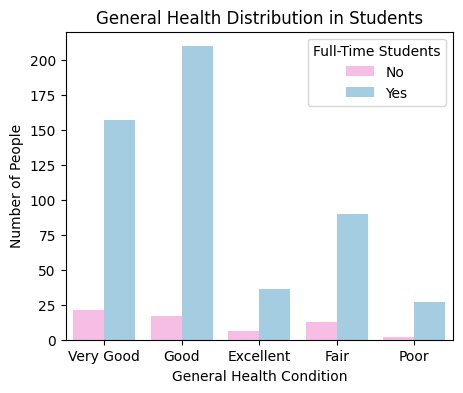

In [26]:
#Vizualitation for 'general health'


ax = sns.countplot(
    x='general_health',
    hue='fulltime',
    data=df,
    palette={False: '#FFB5E8', True: '#9AD0EC'}  # Pastel pink for False, pastel blue for True
)

# legend
ax.legend(title='Full-Time Students', labels=['No', 'Yes'])

# title and axis labels
plt.title('General Health Distribution in Students')
plt.xlabel('General Health Condition')
plt.ylabel('Number of People')

# Show the plot
plt.show()


In [37]:
# Creating an interactive visualization of 'general_health' versus 'year_born' using the Plotly library
## Users can zoom in and zoom out on the graph


import plotly.express as px

# Group the data
year_born_general_health = df.groupby(['general_health', 'year_born']).size().unstack().fillna(0)

# Create the dynamic stacked area chart
fig = px.area(year_born_general_health,
              x=year_born_general_health.index,
              y=year_born_general_health.columns,
              labels={'year_born': 'Year of Birth', 'value': 'Number of People'},
              title='General Health Distribution by Year of Birth',
              template='plotly',
              color_discrete_sequence=px.colors.qualitative.Set1)

# Add legend
fig.update_layout(
    legend_title='General Health Condition',
    legend=dict(title='General Health Condition', x=1.05, y=1)
)

# Show the plot
fig.show()



In [38]:
# Countings females and males
sex_womans = df[df['sex'] == 'Female'].shape[0]
sex_mens = df[df['sex'] == 'Male'].shape[0]


print(f'Total Women: {sex_womans}')
print(f'Total Men: {sex_mens}')


Total Women: 393
Total Men: 186


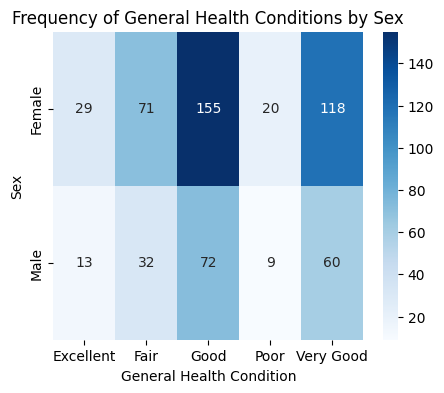

In [39]:
# Creating contingency table
contingency_table = pd.crosstab(df['sex'], df['general_health'])

# Creating a heatmap
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d')
plt.title('Frequency of General Health Conditions by Sex')
plt.xlabel('General Health Condition')
plt.ylabel('Sex')
plt.show()



In [40]:
## Sampling the female gender to enable representative data visualization


# Filter the data by sex
df_female = df[df['sex'] == 'Female']
df_male = df[df['sex'] == 'Male']

# Calculate how many males and females to take (50% of the total)
n_females = len(df_female)
n_males = len(df_male)

# Take a random number of females and males up to the smallest group size
n_samples = min(n_females, n_males)

# Get a random sample of females and males
df_female_sample = df_female.sample(n=n_samples, random_state=42)  # Take the minimum number of females
df_male_sample = df_male.sample(n=n_samples, random_state=42)  # Take the minimum number of males

# Combine the female and male samples
df_balanced_sample = pd.concat([df_female_sample, df_male_sample])

# Shuffle the rows to mix the data
df_balanced_sample = df_balanced_sample.sample(frac=1, random_state=42).reset_index(drop=True)

# Show the result
df_balanced_sample.head(1)



,year_born,state,general_health,phq9_severity,gad7_severity,acha_12months_any_comp,sex,fulltime,international,White_not_Hispanic,Black_not_Hispanic,Hispanic_or_Latino,Asian_or_PacificIslander,AmericanIndian_or_AlaskanNative,Other
0,2001,CA,Good,Mild depression,minimal anxiety,4,Male,True,No,White - not Hispanic (includes Middle Eastern),NaN,Hispanic or Latino,NaN,NaN,NaN


In [41]:
#df.shape
df_balanced_sample.shape


(372, 15)

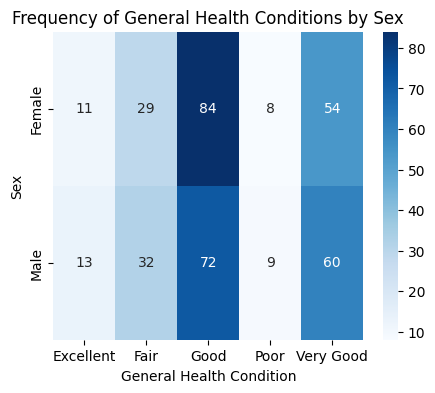

In [44]:
# Creating a contingency table
contingency_table = pd.crosstab(df_balanced_sample['sex'], df_balanced_sample['general_health'])

# heatmap
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d')
plt.title('Frequency of General Health Conditions by Sex')
plt.xlabel('General Health Condition')
plt.ylabel('Sex')
plt.show()


In [58]:
#conteo de estado de salud por sexo
famale_poor = df_balanced_sample[(df_balanced_sample['sex'] == 'Female') & (df_balanced_sample['general_health'] == 'Poor')].shape[0]
famale_fair = df_balanced_sample[(df_balanced_sample['sex'] == 'Female') & (df_balanced_sample['general_health'] == 'Fair')].shape[0]
famale_good = df_balanced_sample[(df_balanced_sample['sex'] == 'Female') & (df_balanced_sample['general_health'] == 'Good')].shape[0]
famale_very_good = df_balanced_sample[(df_balanced_sample['sex'] == 'Female') & (df_balanced_sample['general_health'] == 'Very Good')].shape[0]
famale_excellent = df_balanced_sample[(df_balanced_sample['sex'] == 'Female') & (df_balanced_sample['general_health'] == 'Excellent')].shape[0]

male_poor = df_balanced_sample[(df_balanced_sample['sex'] == 'Male') & (df_balanced_sample['general_health'] == 'Poor')].shape[0]
male_fair = df_balanced_sample[(df_balanced_sample['sex'] == 'Male') & (df_balanced_sample['general_health'] == 'Fair')].shape[0]
male_good = df_balanced_sample[(df_balanced_sample['sex'] == 'Male') & (df_balanced_sample['general_health'] == 'Good')].shape[0]
male_very_good = df_balanced_sample[(df_balanced_sample['sex'] == 'Male') & (df_balanced_sample['general_health'] == 'Very Good')].shape[0]
male_excellent = df_balanced_sample[(df_balanced_sample['sex'] == 'Male') & (df_balanced_sample['general_health'] == 'Excellent')].shape[0]



female_total = df_balanced_sample[df_balanced_sample['sex'] == 'Female'].shape[0]
male_total = df_balanced_sample[df_balanced_sample['sex'] == 'Male'].shape[0]

# Calcular los porcentajes para cada categoría de salud y sexo
female_poor_percentage = (famale_poor / female_total) * 100
female_fair_percentage = (famale_fair / female_total) * 100
female_good_percentage = (famale_good / female_total) * 100
female_very_good_percentage = (famale_very_good / female_total) * 100
female_excellent_percentage = (famale_excellent / female_total) * 100

male_poor_percentage = (male_poor / male_total) * 100
male_fair_percentage = (male_fair / male_total) * 100
male_good_percentage = (male_good / male_total) * 100
male_very_good_percentage = (male_very_good / male_total) * 100
male_excellent_percentage = (male_excellent / male_total) * 100
print('Count by gender')
print(f'Female Poor: {famale_poor}')
print(f'Female Fair: {famale_fair}')
print(f'Female Good: {famale_good}')
print(f'Female Very Good: {famale_very_good}')
print(f'Female Excellent: {famale_excellent}')
print('--------------------------------------')
print(f'Male Poor: {male_poor}')
print(f'Male Fair: {male_fair}')
print(f'Male Good: {male_good}')
print(f'Male Very Good: {male_very_good}')
print(f'Male Excellent: {male_excellent}')

print('--------------------------------------')
# Imprimir los porcentajes
print('Percentages')
print(f'Female Poor Percentage: {female_poor_percentage:.2f}%')
print(f'Female Fair Percentage: {female_fair_percentage:.2f}%')
print(f'Female Good Percentage: {female_good_percentage:.2f}%')
print(f'Female Very Good Percentage: {female_very_good_percentage:.2f}%')
print(f'Female Excellent Percentage: {female_excellent_percentage:.2f}%')
print('--------------------------------------')
print(f'Male Poor Percentage: {male_poor_percentage:.2f}%')
print(f'Male Fair Percentage: {male_fair_percentage:.2f}%')
print(f'Male Good Percentage: {male_good_percentage:.2f}%')
print(f'Male Very Good Percentage: {male_very_good_percentage:.2f}%')
print(f'Male Excellent Percentage: {male_excellent_percentage:.2f}%')


Count by gender
Female Poor: 8
Female Fair: 29
Female Good: 84
Female Very Good: 54
Female Excellent: 11
--------------------------------------
Male Poor: 9
Male Fair: 32
Male Good: 72
Male Very Good: 60
Male Excellent: 13
--------------------------------------
Percentages
Female Poor Percentage: 4.30%
Female Fair Percentage: 15.59%
Female Good Percentage: 45.16%
Female Very Good Percentage: 29.03%
Female Excellent Percentage: 5.91%
--------------------------------------
Male Poor Percentage: 4.84%
Male Fair Percentage: 17.20%
Male Good Percentage: 38.71%
Male Very Good Percentage: 32.26%
Male Excellent Percentage: 6.99%


In [48]:
# Tree map to represent the student's general condition by state

import plotly.express as px

# Grouping and normalizing the data
mental_health_by_state = df_balanced_sample.groupby('state')['general_health'].value_counts(normalize=True).unstack()

# Preparing the data for the Treemap
treemap_data = mental_health_by_state.reset_index().melt(id_vars=['state'], var_name='general_health', value_name='proportion')

# Creating the Treemap chart
fig = px.treemap(
    treemap_data,
    path=['state', 'general_health'],  # Hierarchical levels: state -> general health
    values='proportion',              # Rectangle size based on the proportion
    color='general_health',           # Color by general health category
    color_discrete_sequence=px.colors.qualitative.Set2,
    title='Distribution of General Health by State'
)

# Show the Treemap
fig.show()



# Conclusions
1. Most races believe they have good or very good health condition.

2. Mental health in men was as follows:
* Male Poor Percentage: 4.84%
* Male Fair Percentage: 17.20%
* Male Good Percentage: 38.71%
* Male Very Good Percentage: 32.26%
* Male Excellent Percentage: 6.99%

3. Mental health in women was as follows:
* Female Poor Percentage: 4.30%
* Female Fair Percentage: 15.59%
* Female Good Percentage: 45.16%
* Female Very Good Percentage: 29.03%
* Female Excellent Percentage: 5.91%

4.  Full-time students have better mental health compared to part-time students. * There could be external factors causing this difference, such as economic condition, working while studying, etc.

5. 77.96% of men claim to have at least one general good mental health condition.

6. 80.10% of women claim to have at least one general good mental health condition.

7. Men are at higher risk of having poor mental health.

8. Race does not significantly affect a person's mental health.

9. The samples are unbalanced, and it is not possible to clearly establish which state has better or worse mental health.

10. People born between 1998 and 2003 have the best general mental health condition according to the samples in the dataset.